## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 478d340667831908b5b4bf09a2787a11a14560c9
python           : 3.9.16.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.147+
Version          : #1 SMP Sat Dec 10 16:00:40 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 2.0.0
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.6.1
pip              : 23.0.1
Cython           : 0.29.34
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           :

## Load the data

In [ ]:
# Load data in a pandas dataframe
booking_df = pd.read_csv("VS_Booking.csv")

# Display first few rows
booking_df.head(50)

,Booking_ID,RoomType,FromDate,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status
0,INN14254,Neptune,3/10/2018,2,0,Buffet Breakfast,1,0,1,3,0,219,Online,0,0,102.85,Canceled
1,INN16192,Venus,30/12/2018,2,0,Buffet Breakfast,1,0,2,2,0,23,Online,0,0,133.55,Arrived
2,INN04354,Neptune,19/8/2018,2,0,Buffet Breakfast,1,0,2,3,0,303,Offline,0,0,78.00,Arrived
3,INN01119,Venus,15/8/2018,2,0,Buffet Breakfast,0,0,1,2,0,133,Online,0,0,113.60,Canceled
4,INN17611,Neptune,31/8/2018,1,0,Buffet Breakfast,0,0,0,2,0,70,Online,0,0,121.50,Canceled
5,INN19447,Venus,27/6/2018,2,0,Buffet Breakfast,0,0,1,5,0,35,Online,0,0,128.40,Canceled
6,INN09083,Venus,16/10/2017,2,0,Buffet Breakfast,2,0,2,2,0,45,Online,0,0,78.54,Arrived
7,INN01024,Neptune,6/6/2018,1,0,Buffet Breakfast,0,0,1,1,0,118,Offline,0,0,110.00,Arrived
8,INN24005,Neptune,5/6/2018,1,0,Buffet Breakfast,0,0,2,2,0,163,Offline,0,0,100.00,Canceled
9,INN30274,Neptune,14/10/2018,2,0,Buffet Breakfast,0,0,1,2,0,233,Offline,0,0,90.00,Canceled


## Data cleanup

### Remove duplicates, missing values, outliers and unnecessary rows/columns

In [ ]:
# Check if there are any duplicate rows
booking_df.duplicated().any()

False

In [ ]:
# Check percentage of missing values for each column
col_null_percentage = (booking_df.isna().sum()/booking_df.shape[0]) * 100
col_null_percentage

Booking_ID                    0.0
RoomType                      0.0
FromDate                      0.0
Adults                        0.0
Children                      0.0
Breakfast                     0.0
Number of Special Requests    0.0
Airport Pickup                0.0
Weekend Nights                0.0
Weeknights                    0.0
Loyalty Points                0.0
Lead time in days             0.0
Booking Type                  0.0
Existing Customer             0.0
Previous Cancellations        0.0
Average Room Price            0.0
Booking Status                0.0
dtype: float64

In [ ]:
# Let's check if the dataset is balanced i.e. dataset contains roughly equal number of positive and negative examples
booking_df['Booking Status'].value_counts()

Booking Status
Arrived     21938
Canceled    10709
Name: count, dtype: int64

In [ ]:
booking_df[booking_df['Lead time in days'] < 0]

,Booking_ID,RoomType,FromDate,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status


## Data Exploration

In [ ]:
# Let's check booking status per room type
booking_by_room_type = booking_df.groupby(['RoomType', 'Booking Status'], as_index=False)['Booking_ID'].count().rename(columns={"Booking_ID": "Number Of Bookings"})
booking_by_room_type

,RoomType,Booking Status,Number Of Bookings
0,Jupiter,Arrived,677
1,Jupiter,Canceled,417
2,Mars,Arrived,5
3,Mars,Canceled,2
4,Mercury,Arrived,108
5,Mercury,Canceled,34
6,Neptune,Arrived,17164
7,Neptune,Canceled,8216
8,Saturn,Arrived,407
9,Saturn,Canceled,202


In [ ]:
# Let's plot it to visualize
fig = px.bar(booking_by_room_type, x='RoomType', y='Number Of Bookings', color='Booking Status', barmode='group')
fig.show()

In [ ]:
# Let's parse date
booking_df['Booking Date'] = pd.to_datetime(booking_df.FromDate, format="%d/%m/%Y", errors='coerce')
# Drop rows containing invalid dates such as 29/02/2018
booking_df.dropna(inplace=True)

In [ ]:
# Let's plot it through time to better understand
booking_df['Booking Month-Year'] = booking_df['Booking Date'].apply(lambda x: x.strftime('%Y-%m'))
booking_df['Week Number'] = booking_df['Booking Date'].apply(lambda x: int(x.strftime('%U')))
booking_df['Booking Month'] = booking_df['Booking Date'].apply(lambda x: int(x.strftime('%m')))
booking_df['Booking Year'] = booking_df['Booking Date'].apply(lambda x: int(x.strftime('%Y')))
booking_by_month = booking_df.groupby(['Booking Month-Year', 'Booking Status'], as_index=False)['Booking_ID'].count().rename(columns={"Booking_ID": "Number Of Bookings"})
booking_by_week = booking_df.groupby(['Week Number', 'Booking Status'], as_index=False)['Booking_ID'].count().rename(columns={"Booking_ID": "Number Of Bookings"})

In [ ]:
# Let's plot bookings by month to visualize
fig = px.bar(booking_by_month, x='Booking Month-Year', y='Number Of Bookings', color='Booking Status', barmode='group')
fig.show()

In [ ]:
# Let's plot booking by week to visualize
fig = px.bar(booking_by_week, x='Week Number', y='Number Of Bookings', color='Booking Status', barmode='group')
fig.show()


In [ ]:
booking_by_week['Cancellation Ratio'] = booking_by_week.groupby(['Week Number'])['Number Of Bookings'].transform(lambda x: x/x.sum() * 100)
# Let's plot cancellations by week to visualize
fig = px.line(booking_by_week[booking_by_week['Booking Status'] == 'Canceled'], x='Week Number', y='Cancellation Ratio', markers=True)
fig.show()

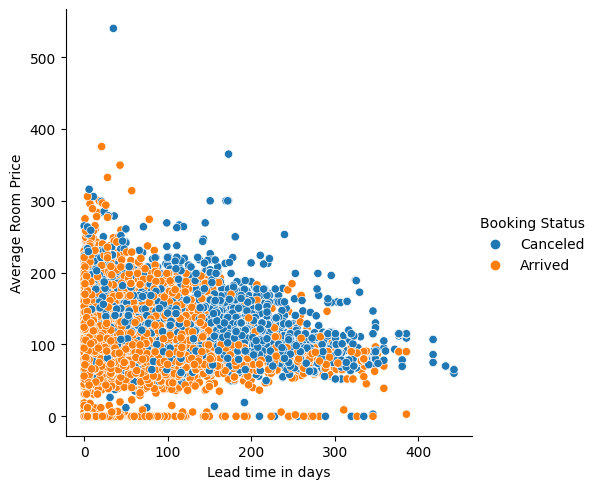

In [ ]:
# Let's explore relationship between Lead time in days, average room price and cancellations
sns.relplot(data=booking_df, x="Lead time in days", y="Average Room Price", hue="Booking Status")

### We can observe that the longer the lead time, the higher is the probability of cancellations.

### Let's convert all columns to numerical so we can generate correlation matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
room_label = label_encoder.fit_transform(booking_df['RoomType'])
booking_df['RoomType_encoded'] = room_label

# encode Breakfast column
breakfast_label = label_encoder.fit_transform(booking_df['Breakfast'])
booking_df['Breakfast_encoded'] = breakfast_label

# encode Booking Type column
booking_type_label = label_encoder.fit_transform(booking_df['Booking Type'])
booking_df['BookingType_encoded'] = booking_type_label


# encode Booking Status column
booking_status_label = label_encoder.fit_transform(booking_df['Booking Status'])
booking_df['is_canceled'] = booking_status_label

booking_df

,Booking_ID,RoomType,FromDate,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,...,Booking Status,Booking Date,Booking Month-Year,Week Number,Booking Month,Booking Year,RoomType_encoded,Breakfast_encoded,BookingType_encoded,is_canceled
0,INN14254,Neptune,3/10/2018,2,0,Buffet Breakfast,1,0,1,3,...,Canceled,2018-10-03,2018-10,39,10,2018,3,0,4,1
1,INN16192,Venus,30/12/2018,2,0,Buffet Breakfast,1,0,2,2,...,Arrived,2018-12-30,2018-12,52,12,2018,5,0,4,0
2,INN04354,Neptune,19/8/2018,2,0,Buffet Breakfast,1,0,2,3,...,Arrived,2018-08-19,2018-08,33,8,2018,3,0,3,0
3,INN01119,Venus,15/8/2018,2,0,Buffet Breakfast,0,0,1,2,...,Canceled,2018-08-15,2018-08,32,8,2018,5,0,4,1
4,INN17611,Neptune,31/8/2018,1,0,Buffet Breakfast,0,0,0,2,...,Canceled,2018-08-31,2018-08,34,8,2018,3,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32642,INN21763,Venus,17/6/2018,1,0,Buffet Breakfast,0,0,0,2,...,Canceled,2018-06-17,2018-06,24,6,2018,5,0,4,1
32643,INN04413,Neptune,13/10/2018,2,0,Buffet Breakfast,0,0,2,3,...,Canceled,2018-10-13,2018-10,40,10,2018,3,0,4,1
32644,INN13780,Neptune,14/11/2018,2,0,Buffet Breakfast,2,0,1,3,...,Arrived,2018-11-14,2018-11,45,11,2018,3,0,4,0
32645,INN28492,Neptune,16/10/2017,1,0,Luxury Buffet Breakfast,0,0,0,2,...,Arrived,2017-10-16,2017-10,42,10,2017,3,1,3,0


,Adults,Children,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Existing Customer,Previous Cancellations,Average Room Price,Week Number,Booking Month,Booking Year,RoomType_encoded,Breakfast_encoded,BookingType_encoded,is_canceled
Adults,1.000000,-0.021429,0.187351,0.010422,0.103519,0.106623,-0.120963,0.099443,-0.191986,-0.046173,0.298025,0.020983,0.019910,0.076685,0.200050,0.025788,0.312907,0.086131
Children,-0.021429,1.000000,0.122189,0.036063,0.029000,0.018427,-0.021340,-0.047126,-0.035658,-0.016076,0.336912,-0.004167,-0.005523,0.045573,-0.365610,-0.085416,0.129963,0.031250
Number of Special Requests,0.187351,0.122189,1.000000,0.086538,0.058104,0.043912,0.023365,-0.104625,-0.009883,-0.004019,0.186331,0.107354,0.107777,0.051241,0.078067,0.008747,0.311822,-0.253381
Airport Pickup,0.010422,0.036063,0.086538,1.000000,-0.030010,-0.048669,0.063426,-0.065594,0.113778,0.028794,0.062680,-0.012978,-0.012526,0.012348,-0.007737,-0.014176,-0.001408,-0.085150
Weekend Nights,0.103519,0.029000,0.058104,-0.030010,1.000000,0.184953,-0.026948,0.046728,-0.065347,-0.021472,-0.007115,-0.004930,-0.012668,0.055498,0.045548,-0.031070,0.127854,0.062703
Weeknights,0.106623,0.018427,0.043912,-0.048669,0.184953,1.000000,-0.050143,0.148272,-0.101757,-0.029180,0.020282,0.030697,0.037554,0.031580,0.080181,-0.086505,0.111845,0.093209
Loyalty Points,-0.120963,-0.021340,0.023365,0.063426,-0.026948,-0.050143,1.000000,-0.079084,0.546871,0.471915,-0.114383,-0.014529,-0.012900,0.025722,-0.023423,-0.040635,-0.207816,-0.060814
Lead time in days,0.099443,-0.047126,-0.104625,-0.065594,0.046728,0.148272,-0.079084,1.000000,-0.135412,-0.048440,-0.062564,0.131749,0.135726,0.145306,-0.029835,-0.026316,-0.009417,0.441626
Existing Customer,-0.191986,-0.035658,-0.009883,0.113778,-0.065347,-0.101757,0.546871,-0.135412,1.000000,0.388255,-0.176036,-0.000513,0.001976,-0.015261,-0.032405,-0.065113,-0.337032,-0.107896
Previous Cancellations,-0.046173,-0.016076,-0.004019,0.028794,-0.021472,-0.029180,0.471915,-0.048440,0.388255,1.000000,-0.061395,-0.041804,-0.041136,0.003994,-0.007965,-0.010979,-0.069985,-0.036975


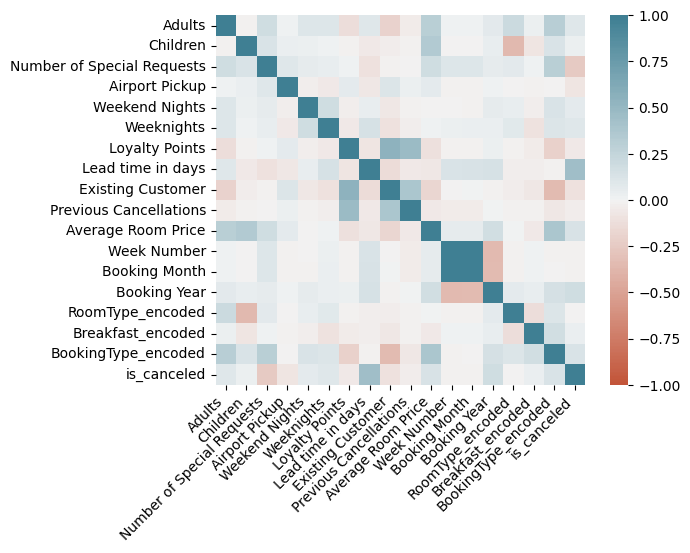

In [ ]:
# Let's generate correlation matrix.
# This can be used in two ways:
# 1. to drop highly correlated columns to avoid duplicate information.
# 2. to find which columns have most correlation with booking cancellations

correlation_matrix = booking_df.corr(numeric_only=True)
ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
correlation_matrix

,Adults,Children,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Existing Customer,Previous Cancellations,Average Room Price,Week Number,Booking Month,Booking Year,RoomType_encoded,Breakfast_encoded,BookingType_encoded,is_canceled
Adults,1.000000,0.027858,0.197489,0.008692,0.120612,0.138940,-0.205701,0.168289,-0.202593,-0.099581,0.285104,0.005867,0.004116,0.075627,0.223262,0.035531,0.290257,0.089915
Children,0.027858,1.000000,0.133403,0.033472,0.032121,0.014141,-0.033395,-0.026541,-0.036804,-0.025787,0.243376,-0.011287,-0.012348,0.058517,-0.204293,-0.086470,0.154621,0.026203
Number of Special Requests,0.197489,0.133403,1.000000,0.092573,0.063981,0.044179,0.002361,-0.084117,-0.010671,-0.024830,0.200656,0.086215,0.086963,0.068380,0.102671,0.002213,0.391498,-0.256293
Airport Pickup,0.008692,0.033472,0.092573,1.000000,-0.029328,-0.054933,0.120061,-0.077873,0.113778,0.033298,0.056789,-0.014766,-0.013760,0.012348,0.001770,-0.019880,0.031239,-0.085150
Weekend Nights,0.120612,0.032121,0.063981,-0.029328,1.000000,0.020953,-0.064687,0.100315,-0.066133,-0.031716,-0.027527,-0.004231,-0.012327,0.059330,0.055297,-0.041525,0.130361,0.055008
Weeknights,0.138940,0.014141,0.044179,-0.054933,0.020953,1.000000,-0.124354,0.246643,-0.117054,-0.045956,0.016636,0.038075,0.046330,0.031813,0.101224,-0.105478,0.092147,0.079914
Loyalty Points,-0.205701,-0.033395,0.002361,0.120061,-0.064687,-0.124354,1.000000,-0.190477,0.936199,0.418840,-0.178259,-0.003145,-0.001116,0.017523,-0.038342,-0.066933,-0.251286,-0.103467
Lead time in days,0.168289,-0.026541,-0.084117,-0.077873,0.100315,0.246643,-0.190477,1.000000,-0.195204,-0.101015,-0.020700,0.075964,0.080159,0.151550,0.004599,-0.001161,-0.036949,0.421456
Existing Customer,-0.202593,-0.036804,-0.010671,0.113778,-0.066133,-0.117054,0.936199,-0.195204,1.000000,0.592587,-0.177987,0.009577,0.012059,-0.015261,-0.041341,-0.069753,-0.250676,-0.107896
Previous Cancellations,-0.099581,-0.025787,-0.024830,0.033298,-0.031716,-0.045956,0.418840,-0.101015,0.592587,1.000000,-0.101161,0.008492,0.010140,-0.040869,-0.030216,-0.041412,-0.125623,-0.058632


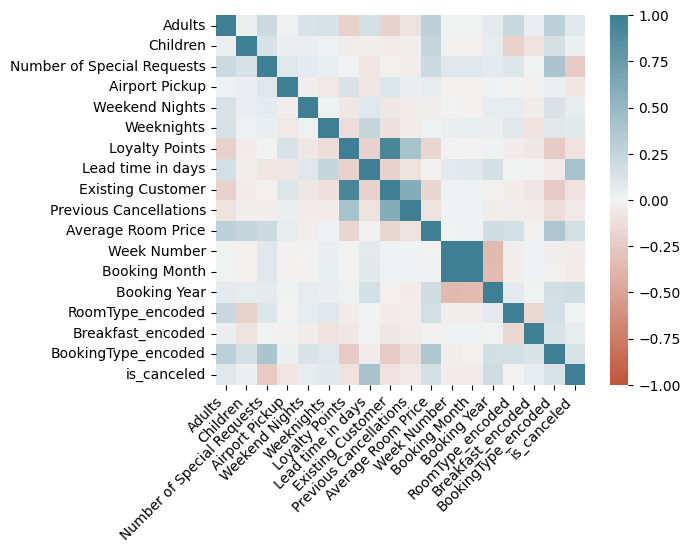

In [ ]:
# Let's try to find non-linear correlation using spearman method
spearman_correlation_matrix = booking_df.corr(method='spearman', numeric_only=True)
ax = sns.heatmap(
    spearman_correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
spearman_correlation_matrix

### From the two correlation matrix, we can make following observations:

#### 1. Loyalty Points have really high correlation with existing customer which makes sense so we don't need to keep both the columns and we can drop one of them.
#### 2. is_canceled has almost no correlation with number of children, previous cancellations, week number, booking month,  room type or breakfast so we can drop these too.
#### 3. We can also drop Booking Year as we have only 2 years data so it's not enough to conclude if this feature is really useful or not.


In [ ]:
feature_columns_to_keep = ['Number of Special Requests', 'Airport Pickup',
                           'Lead time in days', 'Average Room Price',
                           'BookingType_encoded', 'Existing Customer', 'Weeknights',
                           'is_canceled']

In [ ]:
booking_features_df = booking_df[feature_columns_to_keep]
booking_features_df.head()

,Number of Special Requests,Airport Pickup,Lead time in days,Average Room Price,BookingType_encoded,Existing Customer,Weeknights,is_canceled
0,1,0,219,102.85,4,0,3,1
1,1,0,23,133.55,4,0,2,0
2,1,0,303,78.00,3,0,3,0
3,0,0,133,113.60,4,0,2,1
4,0,0,70,121.50,4,0,2,1


In [ ]:
# Check variance of all the features
booking_features_df.var()

Number of Special Requests       0.618008
Airport Pickup                   0.030073
Lead time in days             7434.335688
Average Room Price            1232.949594
BookingType_encoded              0.463291
Existing Customer                0.024778
Weeknights                       2.005462
is_canceled                      0.220471
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
booking_features_df_scaled = pd.DataFrame(scaler.fit_transform(booking_features_df[feature_columns_to_keep[:-1]]), columns=feature_columns_to_keep[:-1])

In [ ]:
print(booking_features_df_scaled.mean(), booking_features_df_scaled.var())

Number of Special Requests    0.123976
Airport Pickup                0.031035
Lead time in days             0.192923
Average Room Price            0.191722
BookingType_encoded           0.887949
Existing Customer             0.025423
Weeknights                    0.129896
dtype: float64 Number of Special Requests    0.024720
Airport Pickup                0.030073
Lead time in days             0.037882
Average Room Price            0.004228
BookingType_encoded           0.028956
Existing Customer             0.024778
Weeknights                    0.006939
dtype: float64


### Build Model

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = booking_features_df_scaled
y = booking_features_df[feature_columns_to_keep[-1]]

In [ ]:
# Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
def print_metrics(y_test, y_pred, classifier):
  accuracy = accuracy_score(y_test, y_pred)
  confusion_mat = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print(f"Accuracy Score of {classifier} is : {accuracy}")
  ax = sns.heatmap(
    confusion_mat,
    annot=True,
    square=True)
  ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
  print(f"Confusion Matrix : \n{confusion_mat}")
  print(f"Classification Report : \n{report}")

Accuracy Score of logistic regression is : 0.8005724215475826
Confusion Matrix : 
[[5909  687]
 [1264 1923]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6596
           1       0.74      0.60      0.66      3187

    accuracy                           0.80      9783
   macro avg       0.78      0.75      0.76      9783
weighted avg       0.80      0.80      0.79      9783



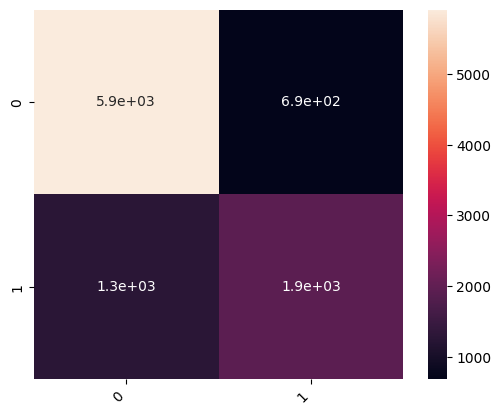

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print_metrics(y_test, y_pred_lr, 'logistic regression')

Accuracy Score of K-Nearest Neighbours is : 0.8559746499028927
Confusion Matrix : 
[[6000  596]
 [ 813 2374]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6596
           1       0.80      0.74      0.77      3187

    accuracy                           0.86      9783
   macro avg       0.84      0.83      0.83      9783
weighted avg       0.85      0.86      0.85      9783



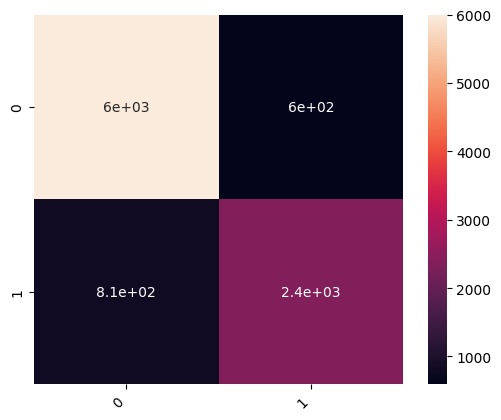

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print_metrics(y_test, y_pred_knn, 'K-Nearest Neighbours')

Accuracy Score of Decision Tree is : 0.8520903608300112
Confusion Matrix : 
[[5871  725]
 [ 722 2465]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6596
           1       0.77      0.77      0.77      3187

    accuracy                           0.85      9783
   macro avg       0.83      0.83      0.83      9783
weighted avg       0.85      0.85      0.85      9783



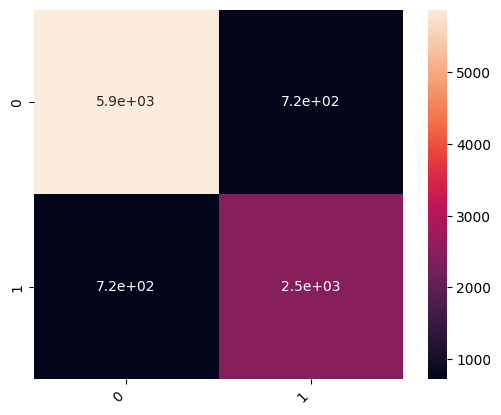

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dtc = decision_tree.predict(X_test)
print_metrics(y_test, y_pred_dtc, 'Decision Tree')

Accuracy Score of Random Forest is : 0.8765204947357661
Confusion Matrix : 
[[6074  522]
 [ 686 2501]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6596
           1       0.83      0.78      0.81      3187

    accuracy                           0.88      9783
   macro avg       0.86      0.85      0.86      9783
weighted avg       0.88      0.88      0.88      9783



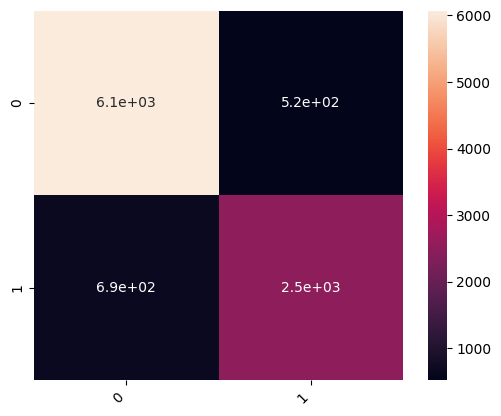

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)
print_metrics(y_test, y_pred_random_forest, 'Random Forest')

Accuracy Score of Support Vector Machine is : 0.8268424818562813
Confusion Matrix : 
[[6033  563]
 [1131 2056]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      6596
           1       0.79      0.65      0.71      3187

    accuracy                           0.83      9783
   macro avg       0.81      0.78      0.79      9783
weighted avg       0.82      0.83      0.82      9783



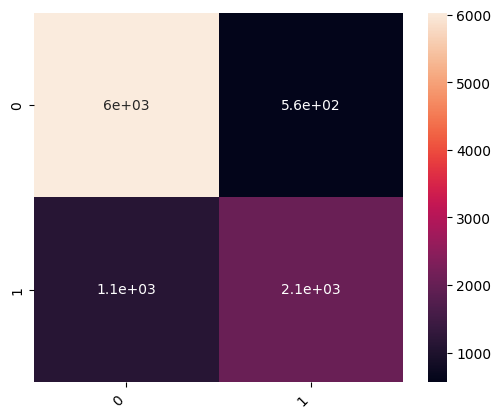

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print_metrics(y_test, y_pred_svm, 'Support Vector Machine')